In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
n = 100  # Number of nodes
m = 4  # Number of initial links
seed = 3000
G = nx.barabasi_albert_graph(n, m, seed)

ncols = 10
# pos = {i : (i % ncols, (n-i-1) // ncols) for i in G.nodes()}
# nx.draw(G, pos, with_labels=True)    
# plt.show()

In [24]:
degrees = G.degree() # dictionary node:degree
values = sorted(set(degrees.values()))
hist = [list(degrees.values()).count(x) for x in values]

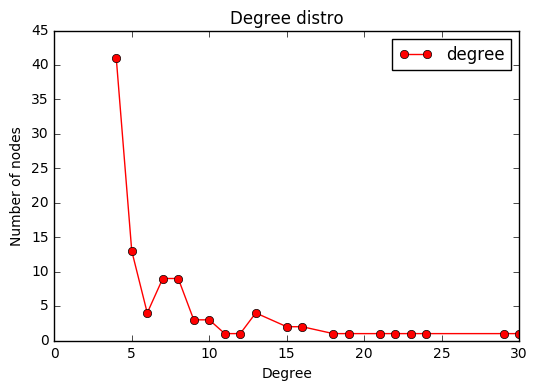

In [25]:
plt.figure()
plt.plot(values,hist,'ro-') # in-degree
plt.legend(['degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distro')
#plt.savefig('degree_distribution.pdf')
plt.show()
plt.close()

In [26]:
class SIRSimulator:
    def __init__(self, graph, beta=0.25, mu=0.05):
        self.g = graph   
        self.BETA = beta
        self.MU = mu
        
    def run(self, seed=[], num_steps=1):
        # if no seed is specified, choose 1 node at random
        if not len(seed):
            seed = [ np.random.choice(self.g.nodes()) ]
            
        # initialize sets of S/I/R nodes
        I_set = set(seed)
        S_set = set(self.g.nodes()).difference(I_set)
        R_set = set()
        t = 0
        
        StoI_set = set(seed) # nodes that underwent S->I transition
        ItoR_set = set() # nodes that underwent I->R transition
 
        while True:
            # generator logic: yield current status every num_steps iterations
            if t % num_steps == 0:
                yield { 't': t, 'S': S_set, 'I': I_set, 'R': R_set,
                       'S->I': StoI_set, 'I->R': ItoR_set }
            
            # stop when there are no infectious nodes left
            if not len(I_set):
                break

            StoI_set = set()
            ItoR_set = set()
            
            # loop over neighbors of infectious nodes
            for i in set(I_set):
                # TRANSMISSION
                for j in S_set.intersection(self.g.neighbors(i)):
                    if np.random.uniform() < self.BETA:
                        S_set.remove(j)
                        I_set.add(j)
                        StoI_set.add(j)
                        
                # RECOVERY
                if np.random.uniform() < self.MU:
                    I_set.remove(i)
                    R_set.add(i)
                    ItoR_set.add(i)
      
            t += 1

In [45]:
N = 3000
G = nx.barabasi_albert_graph(N, 2, 2)

SIR = SIRSimulator(G, beta=0.8, mu=0.04)

In [46]:
degrees = G.degree() # dictionary node:degree
values = sorted(set(degrees.values()))
hist = [list(degrees.values()).count(x) for x in values]

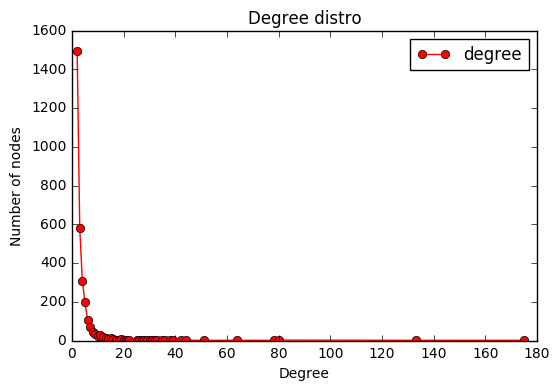

In [47]:
plt.figure()
plt.plot(values,hist,'ro-') # in-degree
plt.legend(['degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distro')
#plt.savefig('degree_distribution.pdf')
plt.show()
plt.close()

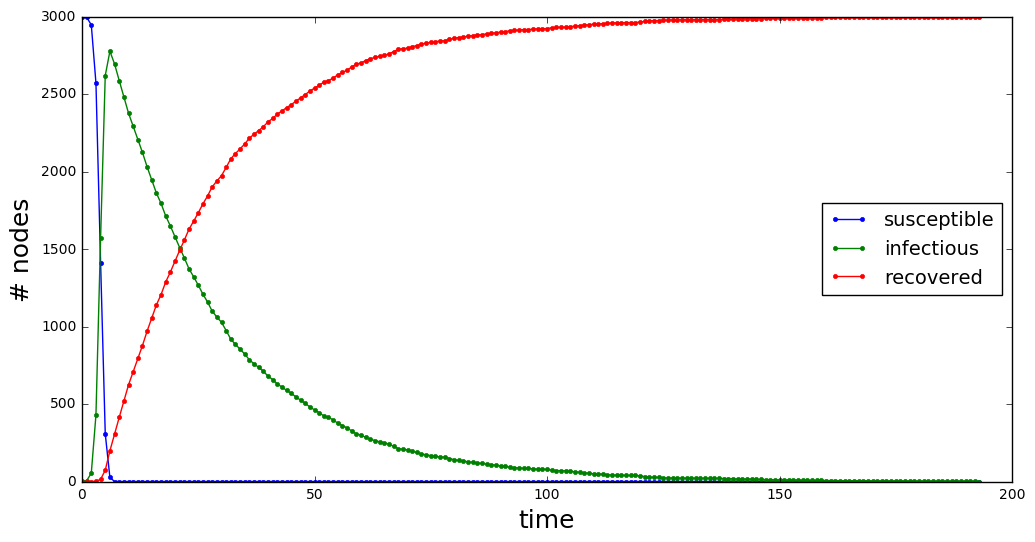

In [48]:
plt.figure(figsize=(12,6))

# notice: this is a single realization and the epidemic might not take off
plt.plot([ (len(status['S']), len(status['I']),len(status['R'])) for status in SIR.run()], '.-')
plt.xlabel('time', fontsize=18)
plt.ylabel('# nodes', fontsize=18)
plt.legend(['susceptible', 'infectious', 'recovered'], fontsize=14, loc=7)
plt.show()